**Importing necessary libraries**

In [ ]:
# pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as sts
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

**Data sourcing**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HospitalityEmployees.csv')

**Data preprocessing**

In [ ]:
df = data.copy()

In [ ]:
df.head(),df.tail()

(       Date  Employees
 0  1/1/1990     1064.5
 1  2/1/1990     1074.5
 2  3/1/1990     1090.0
 3  4/1/1990     1097.4
 4  5/1/1990     1108.7,
           Date  Employees
 343   8/1/2018     2019.1
 344   9/1/2018     1992.5
 345  10/1/2018     1984.3
 346  11/1/2018     1990.1
 347  12/1/2018     2000.2)

In [ ]:
df.describe()

,Employees
count,348.000000
mean,1452.506897
std,256.604914
min,1064.500000
25%,1238.050000
50%,1436.200000
75%,1586.300000
max,2022.100000


In [ ]:
df['Date'].dtype

dtype('O')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(2)

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5


In [ ]:
df.index.dtype

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Employees  348 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


**Plotting the data**

Text(0, 0.5, 'Employees in Thousands')

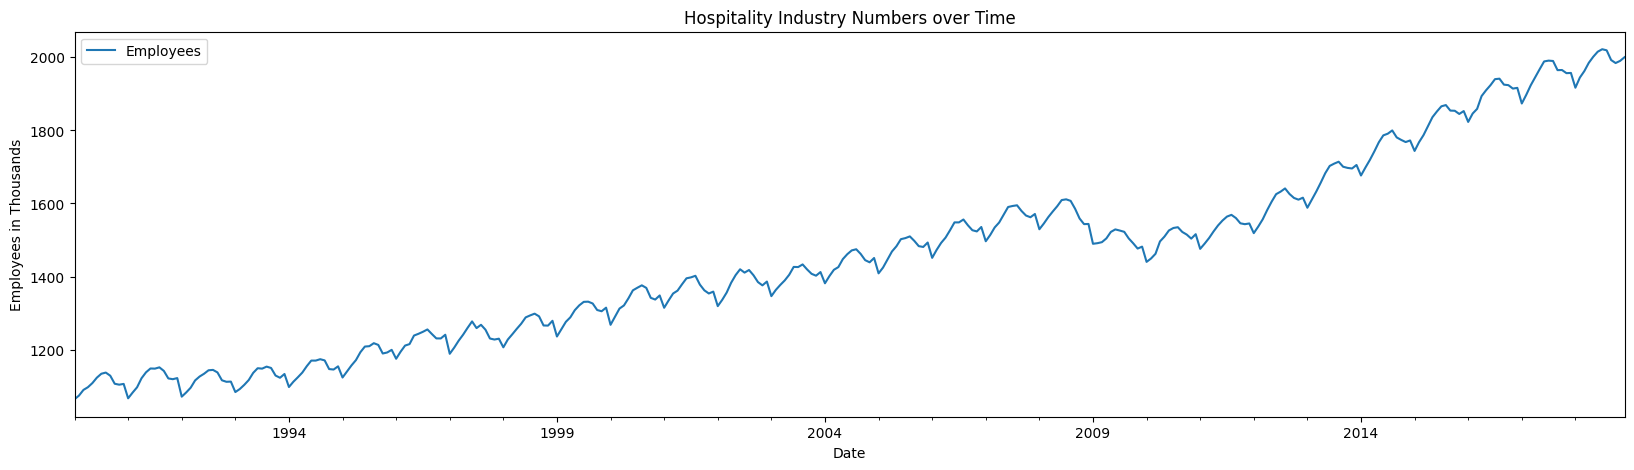

In [ ]:
df.plot(figsize=(20,5))
plt.title('Hospitality Industry Numbers over Time')
plt.ylabel('Employees in Thousands')

We observe a fairly consistent upward trend on our data, with a dip around the 2010 mark.

**Stationarity**

In [ ]:
import statsmodels.tsa.stattools as sts

In [ ]:
sts.adfuller(df)

(0.9012844235569791,
 0.9931070655289933,
 17,
 330,
 {'1%': -3.4503224123605194,
  '5%': -2.870338478726661,
  '10%': -2.571457612488522},
 2207.460360514134)



*   Test_stat (0.901) is larger than our critical values at the (1,5,10) percentiles.
*   The p_value (0.99) is also way above the significance level of about 0.05.

Both observations fail to reject the null hypothesis hence proving that our data is not stationary and will require differencing before modeling.



**Seasonality**

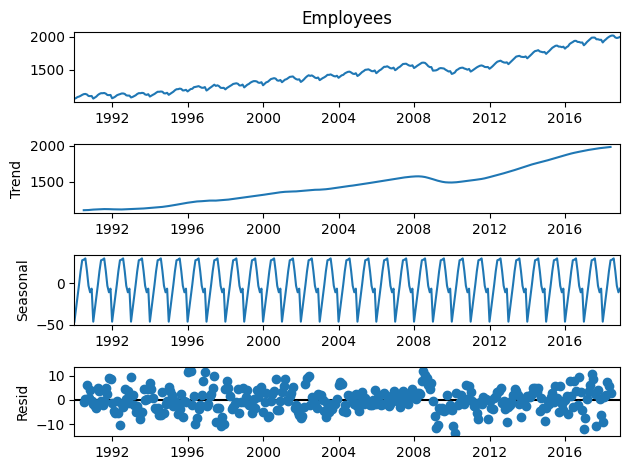

In [ ]:
res = seasonal_decompose(df['Employees'],model='additive')
res.plot()
plt.show()

We seem to have seasonality in our dataset once every year, with residuals appearing randomly.

**Running an auto_arima model.**

In [ ]:
model_auto = auto_arima(df.Employees,stationary=False,seasonal=True,m=12)
model_auto

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 20 Jun 2023   AIC                           2208.504
Time:                                      20:22:12   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.508      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.510      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    702.589      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2994      1.717     17.060      0.000      25.933      32.666
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As expexted, auto arima's recommendation contains both a seasonality component and integrated component to handle both the seasonality and non_stationarity within the data.

The model recomends an arima(1,1,2) with a seasonal order (1,0,1,12)

Splitting the data

In [ ]:
size = int(len(df)*0.95)

df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [ ]:
df_train.shape,df_test.shape

((330, 1), (18, 1))

In [ ]:
model = SARIMAX(df_train,order=(1,1,2),seasonal_order = (1,0,1,12))
res = model.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  330
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1038.131
Date:                              Tue, 20 Jun 2023   AIC                           2088.261
Time:                                      21:01:37   BIC                           2111.038
Sample:                                  01-01-1990   HQIC                          2097.347
                                       - 06-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.468      0.000       0.840       1.008
ma.L1         -0.9590      0.070    -13.629      0.000      -1.097      -0.821
ma.L2          0.1529      0.061      2.500      0.012       0.033       0.273
ar.S.L12       0.9975      0.001    774.230      0.000       0.995       1.000
ma.S.L12      -0.7627      0.045    -17.088      0.000      -0.850      -0.675
sigma2        28.4881      1.665     17.105      0.000      25.224      31.752
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                79.89
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.18
Prob(H) (two-sided):                  0.48   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Model prediction**

In [ ]:
start = len(df_train)
end =  len(df_train) + len(df_test)-1

In [ ]:
pred = res.predict(start = start, end=end).rename('Model_prediction')

Text(0, 0.5, 'No.s in Thousands')

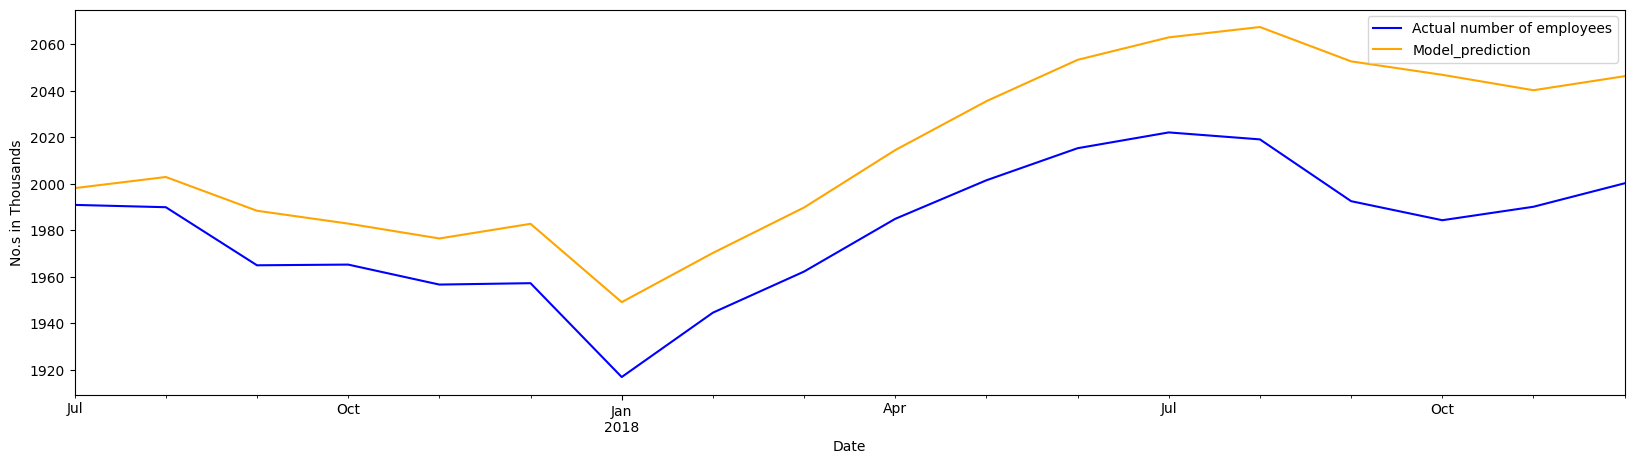

In [ ]:
df_test['Employees'].plot(figsize=(20,5),color='blue',label='Actual number of employees')
pred.plot(color='orange')
plt.legend()
plt.ylabel('No.s in Thousands')

**Model evaluation**

In [ ]:
print(f"Mean_squared_error: {mean_squared_error(df_test,pred)}")
print(f"RMSE: {rmse(df_test,pred)[1]}")

Mean_squared_error: 1348.2900714646864
RMSE: 34.66386804304653


**Forecasting**

In [ ]:
# We'll retrain the model on the whole dataframe and forecast one year into the future.

In [ ]:
start = len(df)
end = len(df) + 11

In [ ]:
mod = SARIMAX(df['Employees'],order=(1,1,2),seasonal_order = (1,0,1,12))
results = mod.fit()
fcast = results.predict(start=start,end=end).rename('Model Forecast')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary star

In [ ]:
len(fcast)

12

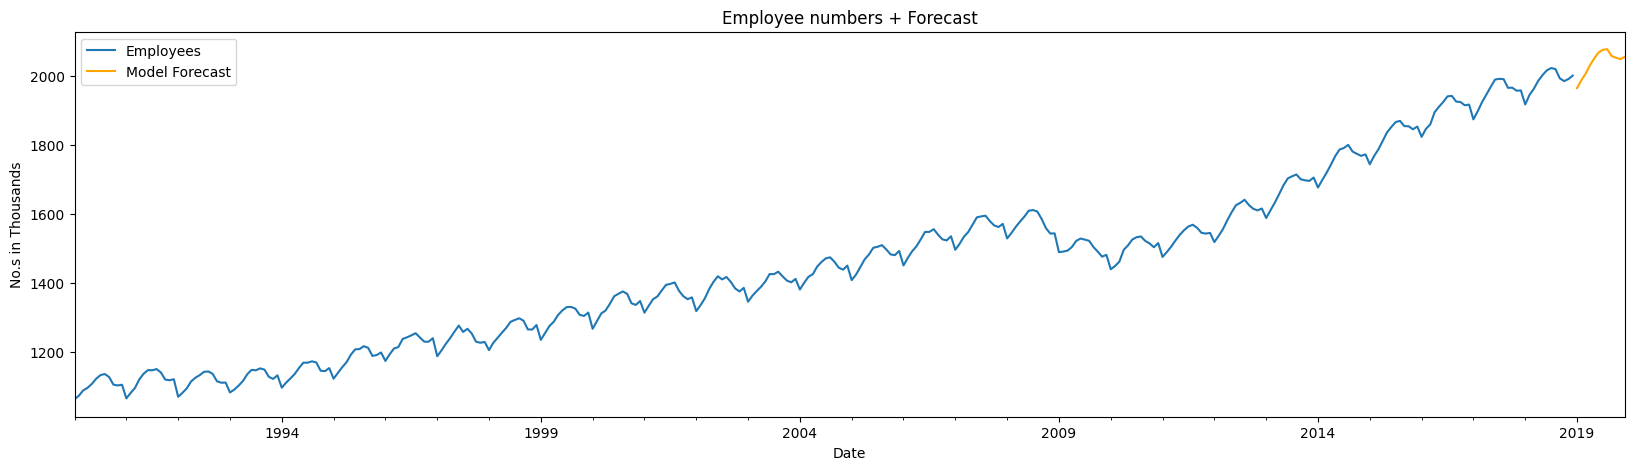

In [ ]:
df['Employees'].plot(figsize=(20,5))
fcast.plot(color='orange',label = 'Model Forecast')
plt.title('Employee numbers + Forecast')
plt.ylabel('No.s in Thousands')
plt.legend()